<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [17]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import time
plt.style.use('default')

# Device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

# Seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)


Device: cuda


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

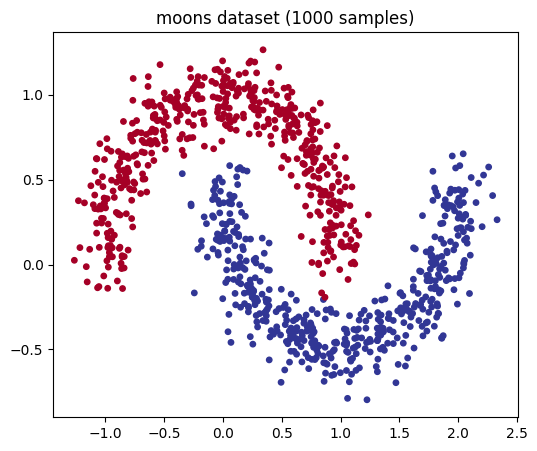

Shapes:
X_train torch.Size([800, 2]) y_train torch.Size([800, 1])
X_test  torch.Size([200, 2]) y_test  torch.Size([200, 1])


In [18]:

X, y = make_moons(n_samples=1000, noise=0.12, random_state=42)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, s=15)
plt.title("moons dataset (1000 samples)")
plt.show()

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().unsqueeze(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

print("Shapes:")
print("X_train", X_train.shape, "y_train", y_train.shape)
print("X_test ", X_test.shape, "y_test ", y_test.shape)


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [19]:
class MoonModelV0(nn.Module):
    def __init__(self, input_dim=2, hidden1=32, hidden2=16, output_dim=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, output_dim)
        )
    def forward(self, x):
        return self.net(x)

model = MoonModelV0().to(device)
print(model)


MoonModelV0(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [20]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def binary_accuracy(y_pred_labels, y_true):
    return (y_pred_labels.eq(y_true).sum().item() / len(y_true)) * 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test   = X_test.to(device), y_test.to(device)


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [21]:
epochs = 1000
start = time.time()
for epoch in range(1, epochs+1):
    model.train()
    logits = model(X_train)
    loss = loss_fn(logits, y_train)
    probs = torch.sigmoid(logits)
    preds = torch.round(probs)
    train_acc = binary_accuracy(preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == 1:
        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test)
            test_loss = loss_fn(test_logits, y_test)
            test_probs = torch.sigmoid(test_logits)
            test_preds = torch.round(test_probs)
            test_acc = binary_accuracy(test_preds, y_test)

        print(f"Epoch {epoch:4d}/{epochs} | train_loss: {loss.item():.4f} | train_acc: {train_acc:.2f}% | test_loss: {test_loss.item():.4f} | test_acc: {test_acc:.2f}%")
end = time.time()
print(f"Training finished in {end-start:.1f}s")


Epoch    1/1000 | train_loss: 0.7006 | train_acc: 50.00% | test_loss: 0.6764 | test_acc: 90.50%
Epoch   10/1000 | train_loss: 0.5556 | train_acc: 86.38% | test_loss: 0.5422 | test_acc: 84.00%
Epoch   20/1000 | train_loss: 0.3814 | train_acc: 86.38% | test_loss: 0.3751 | test_acc: 85.00%
Epoch   30/1000 | train_loss: 0.2682 | train_acc: 89.00% | test_loss: 0.2591 | test_acc: 90.00%
Epoch   40/1000 | train_loss: 0.1963 | train_acc: 92.00% | test_loss: 0.1845 | test_acc: 92.00%
Epoch   50/1000 | train_loss: 0.1393 | train_acc: 94.25% | test_loss: 0.1254 | test_acc: 95.50%
Epoch   60/1000 | train_loss: 0.0884 | train_acc: 97.62% | test_loss: 0.0770 | test_acc: 98.50%
Epoch   70/1000 | train_loss: 0.0513 | train_acc: 99.12% | test_loss: 0.0429 | test_acc: 99.50%
Epoch   80/1000 | train_loss: 0.0317 | train_acc: 99.50% | test_loss: 0.0249 | test_acc: 100.00%
Epoch   90/1000 | train_loss: 0.0221 | train_acc: 99.62% | test_loss: 0.0165 | test_acc: 100.00%
Epoch  100/1000 | train_loss: 0.0169 |

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

Logits:
 [ 16.833677 -48.262436 -44.020638 -32.875416  10.581347 -25.844496
  10.972919  10.150056]
Pred probs:
 [1.0000000e+00 1.0962016e-21 7.6221947e-20 5.2770144e-15 9.9997461e-01
 5.9686774e-12 9.9998283e-01 9.9996090e-01]
Pred labels:
 [1. 0. 0. 0. 1. 0. 1. 1.]


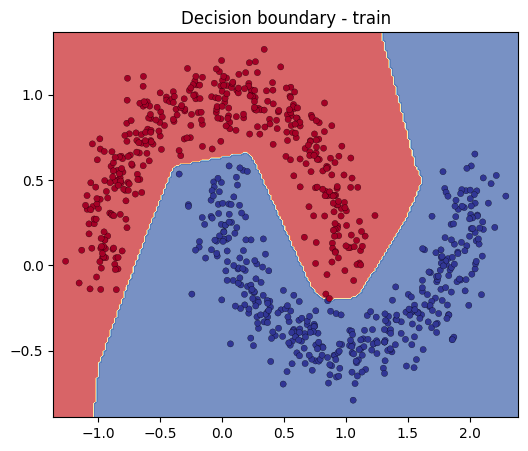

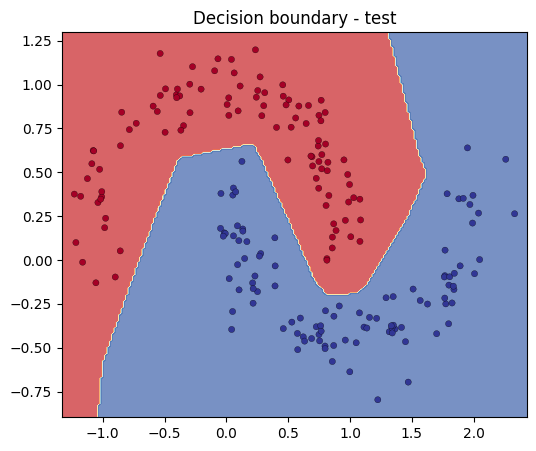

In [22]:

model.eval()
with torch.inference_mode():
    sample_logits = model(X_train[:8].to(device))
    sample_probs  = torch.sigmoid(sample_logits)
    sample_labels = torch.round(sample_probs)

print("Logits:\n", sample_logits.detach().cpu().numpy().ravel())
print("Pred probs:\n", sample_probs.detach().cpu().numpy().ravel())
print("Pred labels:\n", sample_labels.detach().cpu().numpy().ravel())

def plot_decision_boundary(model, X, y, title=None):
    model.to("cpu")
    X_cpu, y_cpu = X.to("cpu"), y.to("cpu")
    x_min, x_max = X_cpu[:,0].min() - 0.1, X_cpu[:,0].max() + 0.1
    y_min, y_max = X_cpu[:,1].min() - 0.1, X_cpu[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 201), np.linspace(y_min, y_max, 201))
    X_to_pred = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    model.eval()
    with torch.inference_mode():
        logits = model(X_to_pred)
        y_pred = torch.round(torch.sigmoid(logits)).reshape(xx.shape).detach().numpy()
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X_cpu[:,0], X_cpu[:,1], c=y_cpu.reshape(-1), s=20, cmap=plt.cm.RdYlBu, edgecolor='k', linewidth=0.2)
    if title: plt.title(title)
    plt.show()

plot_decision_boundary(model, X_train.cpu(), y_train.cpu(), title="Decision boundary - train")
plot_decision_boundary(model, X_test.cpu(), y_test.cpu(), title="Decision boundary - test")


## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

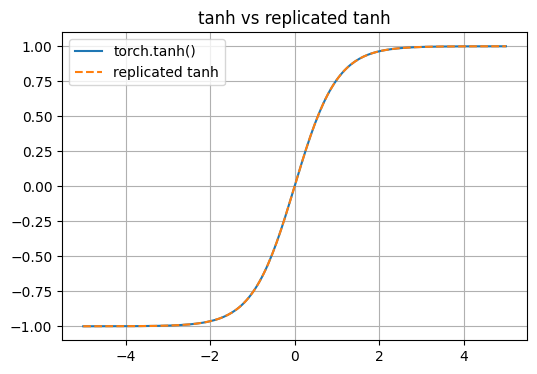

max absolute difference: 1.1920928955078125e-07


In [23]:
x = torch.linspace(-5, 5, 200)
torch_tanh = torch.tanh(x)

replicated_tanh = (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.figure(figsize=(6,4))
plt.plot(x.numpy(), torch_tanh.numpy(), label="torch.tanh()")
plt.plot(x.numpy(), replicated_tanh.numpy(), linestyle='--', label="replicated tanh")
plt.legend()
plt.title("tanh vs replicated tanh")
plt.grid(True)
plt.show()

print("max absolute difference:", (torch_tanh - replicated_tanh).abs().max().item())


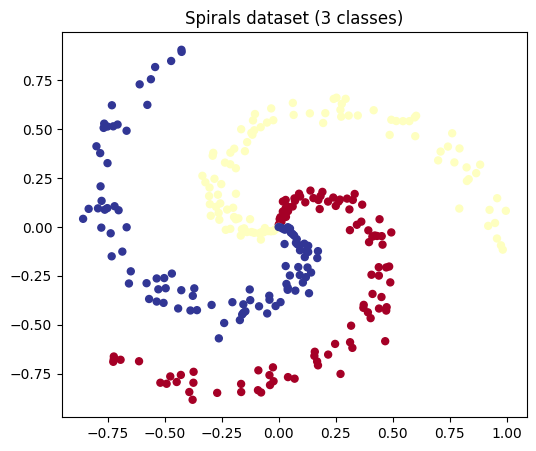

Spiral shapes: torch.Size([240, 2]) torch.Size([240]) torch.Size([60, 2]) torch.Size([60])


In [24]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100
D = 2
K = 3
X_sp = np.zeros((N*K, D))
y_sp = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
    X_sp[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y_sp[ix] = j

plt.figure(figsize=(6,5))
plt.scatter(X_sp[:,0], X_sp[:,1], c=y_sp, s=25, cmap=plt.cm.RdYlBu)
plt.title("Spirals dataset (3 classes)")
plt.show()

X_sp = torch.from_numpy(X_sp).float()
y_sp = torch.from_numpy(y_sp).long()

Xsp_train, Xsp_test, ysp_train, ysp_test = train_test_split(X_sp, y_sp, test_size=0.2, random_state=RANDOM_SEED)

Xsp_train, ysp_train = Xsp_train.to(device), ysp_train.to(device)
Xsp_test,  ysp_test  = Xsp_test.to(device),  ysp_test.to(device)

print("Spiral shapes:", Xsp_train.shape, ysp_train.shape, Xsp_test.shape, ysp_test.shape)


In [25]:
class SpiralNet(nn.Module):
    def __init__(self, input_dim=2, hidden1=128, hidden2=64, num_classes=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, num_classes)
        )
    def forward(self, x):
        return self.net(x)

model_sp = SpiralNet().to(device)
print(model_sp)


SpiralNet(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)


In [26]:
loss_fn_sp = nn.CrossEntropyLoss()
optimizer_sp = torch.optim.Adam(model_sp.parameters(), lr=0.01)

def multiclass_accuracy(logits, y_true):
    preds = logits.argmax(dim=1)
    return (preds.eq(y_true).sum().item() / len(y_true)) * 100


In [27]:
epochs_sp = 1000
start = time.time()
for epoch in range(1, epochs_sp+1):
    model_sp.train()
    logits = model_sp(Xsp_train)
    loss = loss_fn_sp(logits, ysp_train)
    acc_train = multiclass_accuracy(logits, ysp_train)

    optimizer_sp.zero_grad()
    loss.backward()
    optimizer_sp.step()

    if epoch % 100 == 0 or epoch == 1:
        model_sp.eval()
        with torch.inference_mode():
            test_logits = model_sp(Xsp_test)
            test_loss = loss_fn_sp(test_logits, ysp_test)
            test_acc = multiclass_accuracy(test_logits, ysp_test)
        print(f"[Spirals] Epoch {epoch:4d}/{epochs_sp} | train_loss: {loss.item():.4f} | train_acc: {acc_train:.2f}% | test_loss: {test_loss.item():.4f} | test_acc: {test_acc:.2f}%")
end = time.time()
print("Spiral training finished in %.1fs" % (end-start))


[Spirals] Epoch    1/1000 | train_loss: 1.0971 | train_acc: 33.75% | test_loss: 1.0276 | test_acc: 55.00%
[Spirals] Epoch  100/1000 | train_loss: 0.0288 | train_acc: 99.17% | test_loss: 0.0039 | test_acc: 100.00%
[Spirals] Epoch  200/1000 | train_loss: 0.0196 | train_acc: 99.17% | test_loss: 0.0004 | test_acc: 100.00%
[Spirals] Epoch  300/1000 | train_loss: 0.0165 | train_acc: 99.17% | test_loss: 0.0001 | test_acc: 100.00%
[Spirals] Epoch  400/1000 | train_loss: 0.0153 | train_acc: 99.17% | test_loss: 0.0000 | test_acc: 100.00%
[Spirals] Epoch  500/1000 | train_loss: 0.0148 | train_acc: 99.17% | test_loss: 0.0000 | test_acc: 100.00%
[Spirals] Epoch  600/1000 | train_loss: 0.0145 | train_acc: 99.17% | test_loss: 0.0000 | test_acc: 100.00%
[Spirals] Epoch  700/1000 | train_loss: 0.0144 | train_acc: 99.17% | test_loss: 0.0000 | test_acc: 100.00%
[Spirals] Epoch  800/1000 | train_loss: 0.0141 | train_acc: 99.17% | test_loss: 0.0000 | test_acc: 100.00%
[Spirals] Epoch  900/1000 | train_loss

Logits (first 8):
 [[-13.175275   -3.2743669  13.909476 ]
 [ 20.371052  -54.779255   -1.2383765]
 [ 13.618482   -6.1379666   0.8232379]
 [ 13.908696   28.784761  -26.875233 ]
 [ 17.7441     35.098385  -35.18994  ]
 [ 17.930159   -1.8823891  -4.360286 ]
 [ 18.63906    -5.166458   -2.6143682]
 [ -9.507684   -9.636402    8.132747 ]]
Pred probs (first 8):
 [[1.7268000e-12 3.4447012e-08 1.0000000e+00]
 [1.0000000e+00 2.3048173e-33 4.1223464e-10]
 [9.9999726e-01 2.6295544e-09 2.7739261e-06]
 [3.4626359e-07 9.9999964e-01 6.7169282e-25]
 [2.9048925e-08 1.0000000e+00 2.9796558e-31]
 [1.0000000e+00 2.4861073e-09 2.0863281e-10]
 [1.0000000e+00 4.5855902e-11 5.8850980e-10]
 [2.1820183e-08 1.9184757e-08 1.0000000e+00]]
Pred labels (first 8):
 [2 0 0 1 1 0 0 2]


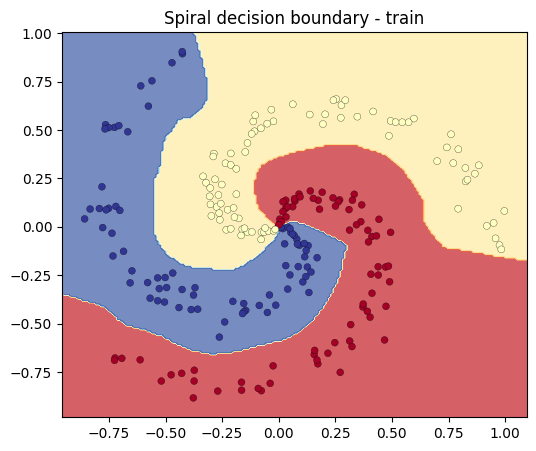

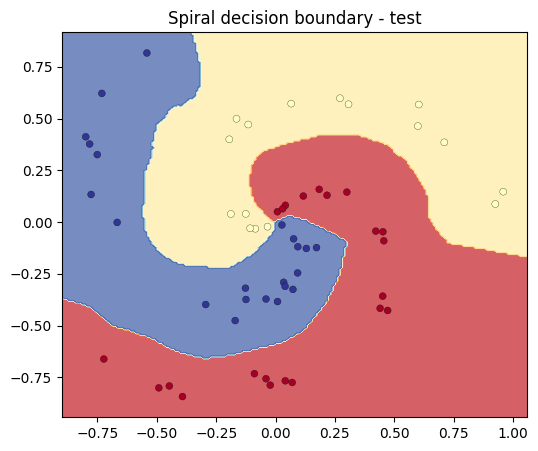

In [28]:
model_sp.eval()
with torch.inference_mode():
    sample_logits = model_sp(Xsp_train[:8])
    sample_probs = torch.softmax(sample_logits, dim=1)
    sample_labels = sample_logits.argmax(dim=1)

print("Logits (first 8):\n", sample_logits.detach().cpu().numpy())
print("Pred probs (first 8):\n", sample_probs.detach().cpu().numpy())
print("Pred labels (first 8):\n", sample_labels.detach().cpu().numpy())

def plot_decision_boundary_multi(model, X, y, title=None):
    model.to("cpu")
    X_cpu, y_cpu = X.to("cpu"), y.to("cpu")
    x_min, x_max = X_cpu[:,0].min() - 0.1, X_cpu[:,0].max() + 0.1
    y_min, y_max = X_cpu[:,1].min() - 0.1, X_cpu[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 201), np.linspace(y_min, y_max, 201))
    X_to_pred = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    model.eval()
    with torch.inference_mode():
        logits = model(X_to_pred)
        y_pred = logits.softmax(dim=1).argmax(dim=1).reshape(xx.shape).detach().numpy()
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X_cpu[:,0], X_cpu[:,1], c=y_cpu.reshape(-1), s=25, cmap=plt.cm.RdYlBu, edgecolor='k', linewidth=0.2)
    if title: plt.title(title)
    plt.show()

plot_decision_boundary_multi(model_sp, Xsp_train.cpu(), ysp_train.cpu(), title="Spiral decision boundary - train")
plot_decision_boundary_multi(model_sp, Xsp_test.cpu(), ysp_test.cpu(), title="Spiral decision boundary - test")
